<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Packages" data-toc-modified-id="Load-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Packages</a></span></li><li><span><a href="#Read-Dataset" data-toc-modified-id="Read-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Dataset</a></span></li><li><span><a href="#EDA---Univariate" data-toc-modified-id="EDA---Univariate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA - Univariate</a></span></li><li><span><a href="#EDA---Bivariate" data-toc-modified-id="EDA---Bivariate-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA - Bivariate</a></span></li><li><span><a href="#Missing-Value-Treatment" data-toc-modified-id="Missing-Value-Treatment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Missing Value Treatment</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#RandomForest-Model" data-toc-modified-id="RandomForest-Model-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>RandomForest Model</a></span></li><li><span><a href="#XGBoost-modeling" data-toc-modified-id="XGBoost-modeling-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>XGBoost modeling</a></span></li></ul></li></ul></div>

## Load Packages

In [4]:
## load packages
library(data.table) # used for reading and manipulation of data
library(dplyr)      # used for data manipulation and joining
library(ggplot2)    # used for ploting 
library(caret)      # used for modeling
library(corrplot)   # used for making correlation plot
library(xgboost)    # used for building XGBoost model
library(cowplot)    # used for combining multiple plots 


Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave



## Read Dataset

In [7]:
## read datasets
train = fread("Train_Data.csv")
test = fread("Test_Data.csv")
submission = fread("SampleSubmission.csv")

In [8]:
## train data column names
names(train)

## test data column names
names(test)

## structure of train data
str(train)

## structure of test data
str(test)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"

Classes 'data.table' and 'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : chr  "FDA15" "DRC01" "FDN15" "FDX07" ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : chr  "Low Fat" "Regular" "Low Fat" "Regular" ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : chr  "Dairy" "Soft Drinks" "Meat" "Fruits and Vegetables" ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT018" "OUT049" "OUT010" ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "Medium" "Medium" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 3" "Tier 1" "Tier 3" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type2" "Supermarket Type1" "Grocery Store" ...
 $ Item_Outlet_Sales        : num  3735 443 2097 732 995 ...
 - attr(*, ".i

In [9]:
test[,Item_Outlet_Sales := NA] ## add Item_Outlet_Sales to test data

combi = rbind(train, test) # combining train and test datasets

## EDA - Univariate

Warning message:
"Removed 2439 rows containing non-finite values (stat_bin)."

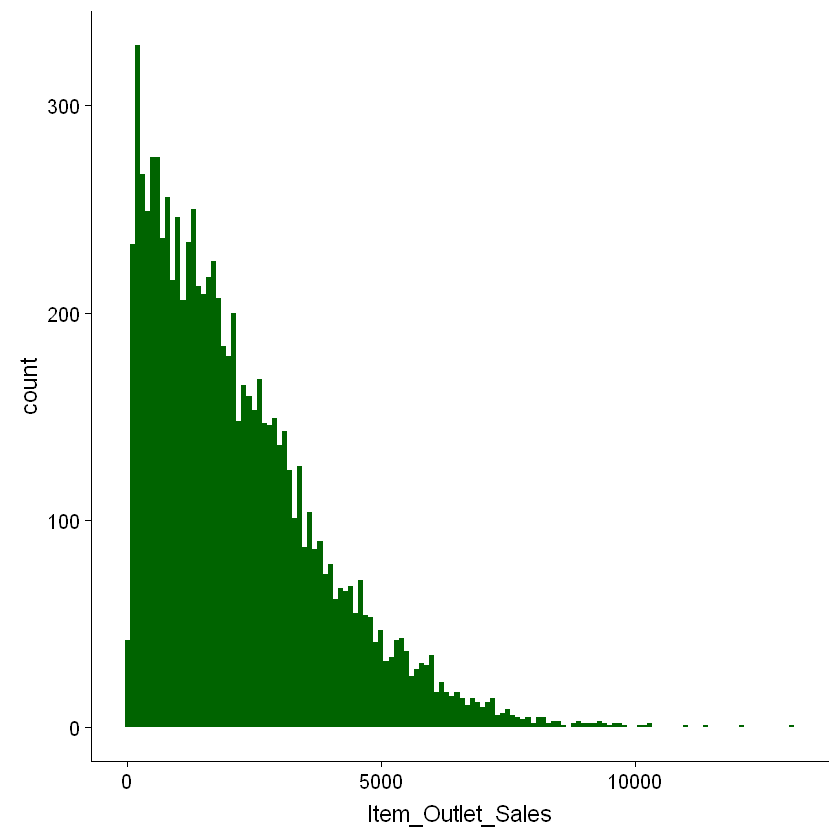

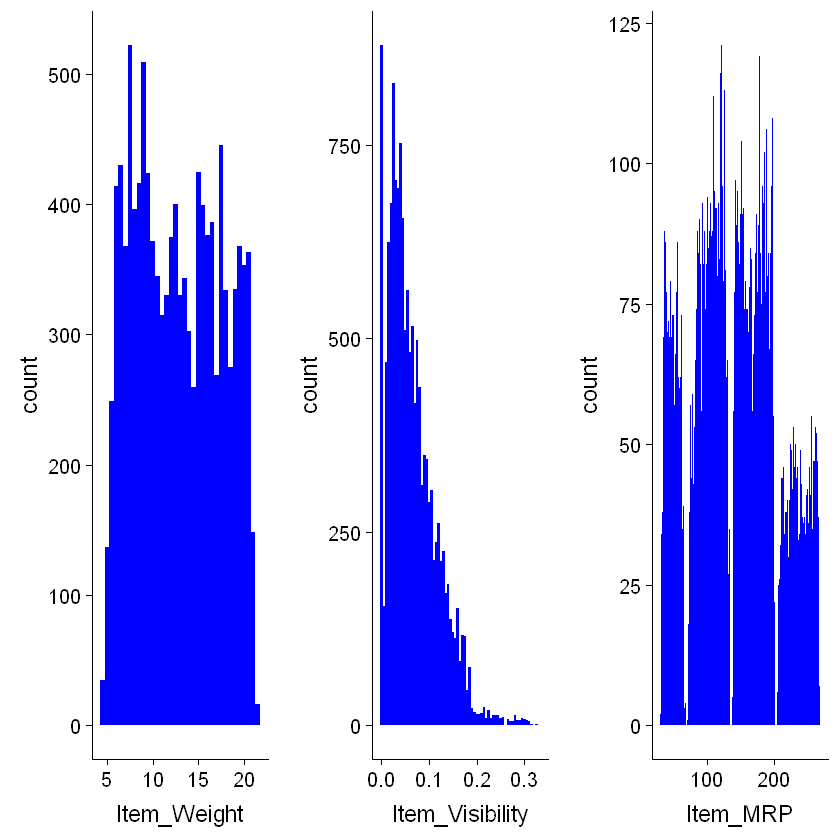

In [10]:
## EDA - Univariate

ggplot(train) + geom_histogram(aes(train$Item_Outlet_Sales), binwidth = 100, fill = "darkgreen") +
  xlab("Item_Outlet_Sales")


p1 = ggplot(combi) + geom_histogram(aes(Item_Weight), binwidth = 0.5, fill = "blue")

p2 = ggplot(combi) + geom_histogram(aes(Item_Visibility), binwidth = 0.005, fill = "blue")

p3 = ggplot(combi) + geom_histogram(aes(Item_MRP), binwidth = 1, fill = "blue")

plot_grid(p1, p2, p3, nrow = 1) # plot_grid() from cowplot package

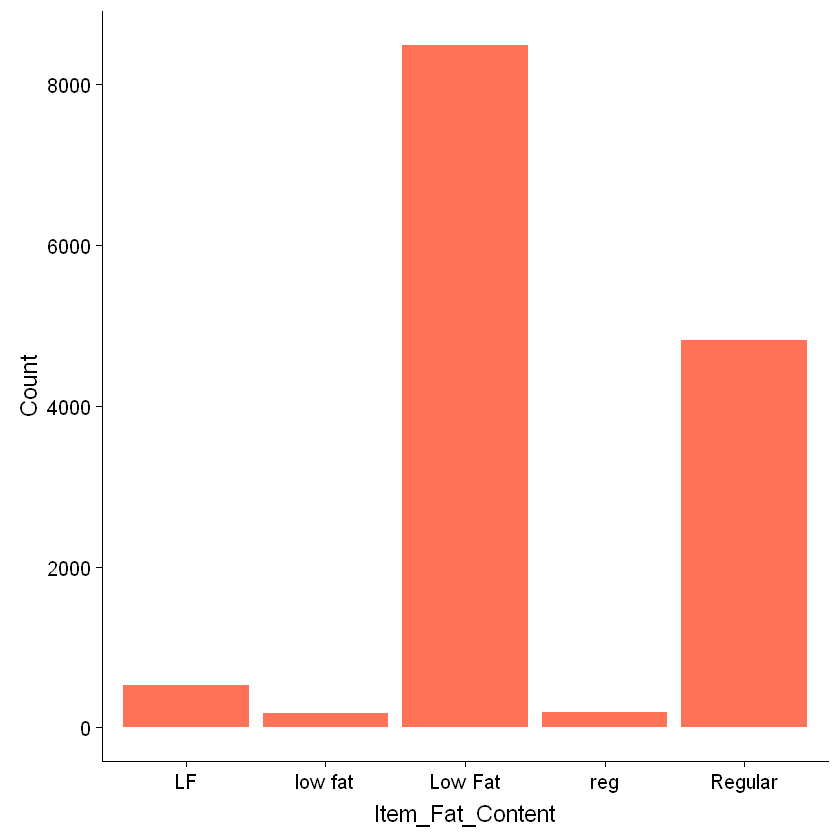

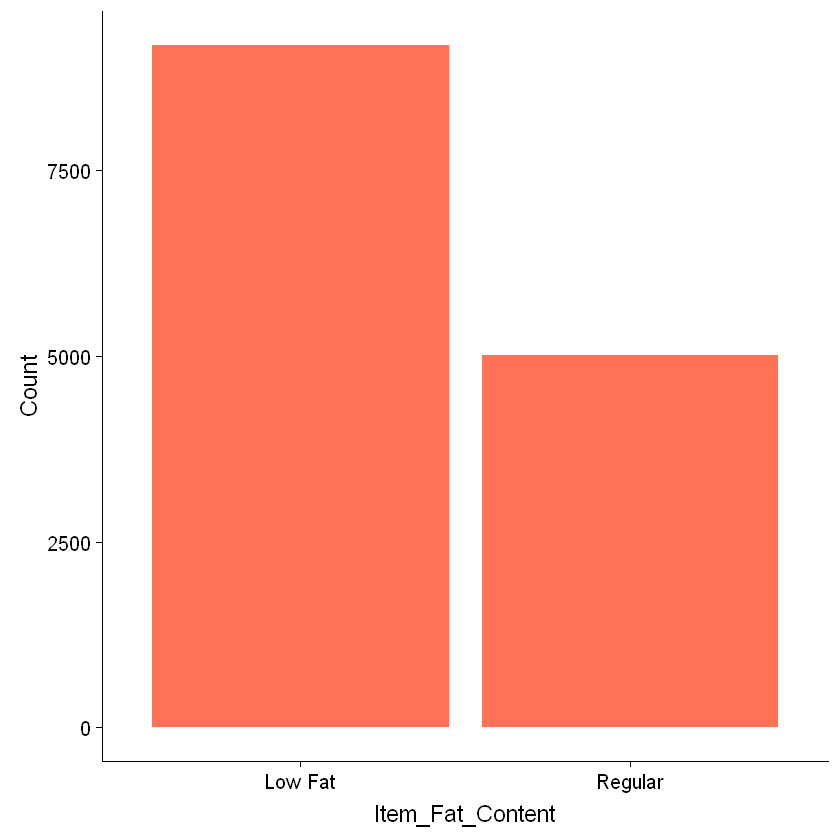

In [11]:
ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) + 
  geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "coral1")

combi$Item_Fat_Content[combi$Item_Fat_Content == "LF"] = "Low Fat"
combi$Item_Fat_Content[combi$Item_Fat_Content == "low fat"] = "Low Fat"
combi$Item_Fat_Content[combi$Item_Fat_Content == "reg"] = "Regular"

ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) + 
  geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "coral1")

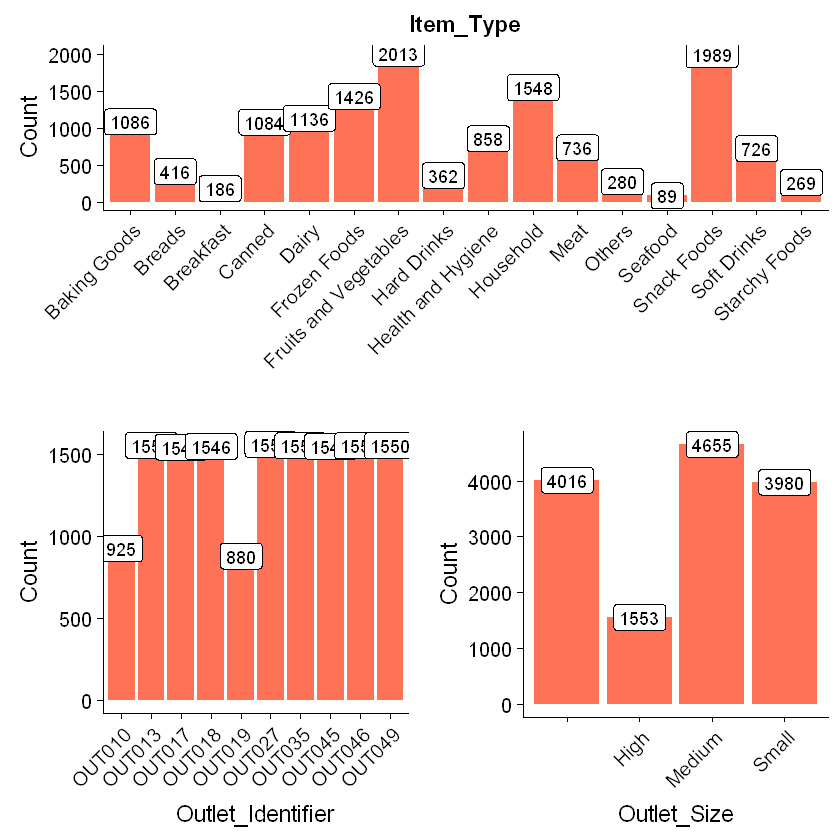

In [12]:
# plot for Item_Type
p4 = ggplot(combi %>% group_by(Item_Type) %>% summarise(Count = n())) + 
  geom_bar(aes(Item_Type, Count), stat = "identity", fill = "coral1") +
  xlab("") +
  geom_label(aes(Item_Type, Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  ggtitle("Item_Type")

# plot for Outlet_Identifier
p5 = ggplot(combi %>% group_by(Outlet_Identifier) %>% summarise(Count = n())) + 
  geom_bar(aes(Outlet_Identifier, Count), stat = "identity", fill = "coral1") +
  geom_label(aes(Outlet_Identifier, Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# plot for Outlet_Size
p6 = ggplot(combi %>% group_by(Outlet_Size) %>% summarise(Count = n())) + 
  geom_bar(aes(Outlet_Size, Count), stat = "identity", fill = "coral1") +
  geom_label(aes(Outlet_Size, Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

second_row = plot_grid(p5, p6, nrow = 1)

plot_grid(p4, second_row, ncol = 1)

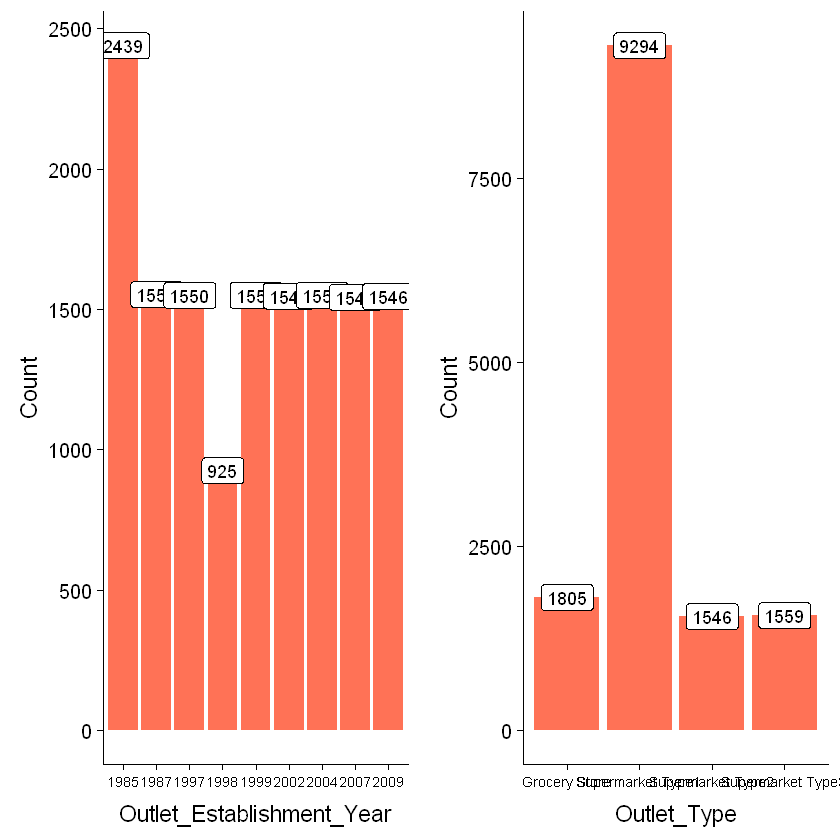

In [13]:
# plot for Outlet_Establishment_Year
p7 = ggplot(combi %>% group_by(Outlet_Establishment_Year) %>% summarise(Count = n())) + 
  geom_bar(aes(factor(Outlet_Establishment_Year), Count), stat = "identity", fill = "coral1") +
  geom_label(aes(factor(Outlet_Establishment_Year), Count, label = Count), vjust = 0.5) +
  xlab("Outlet_Establishment_Year") +
  theme(axis.text.x = element_text(size = 8.5))

# plot for Outlet_Type
p8 = ggplot(combi %>% group_by(Outlet_Type) %>% summarise(Count = n())) + 
  geom_bar(aes(Outlet_Type, Count), stat = "identity", fill = "coral1") +
  geom_label(aes(factor(Outlet_Type), Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(size = 8.5))

# ploting both plots together
plot_grid(p7, p8, ncol = 2)

## EDA - Bivariate

Warning message:
"Removed 1463 rows containing missing values (geom_point)."

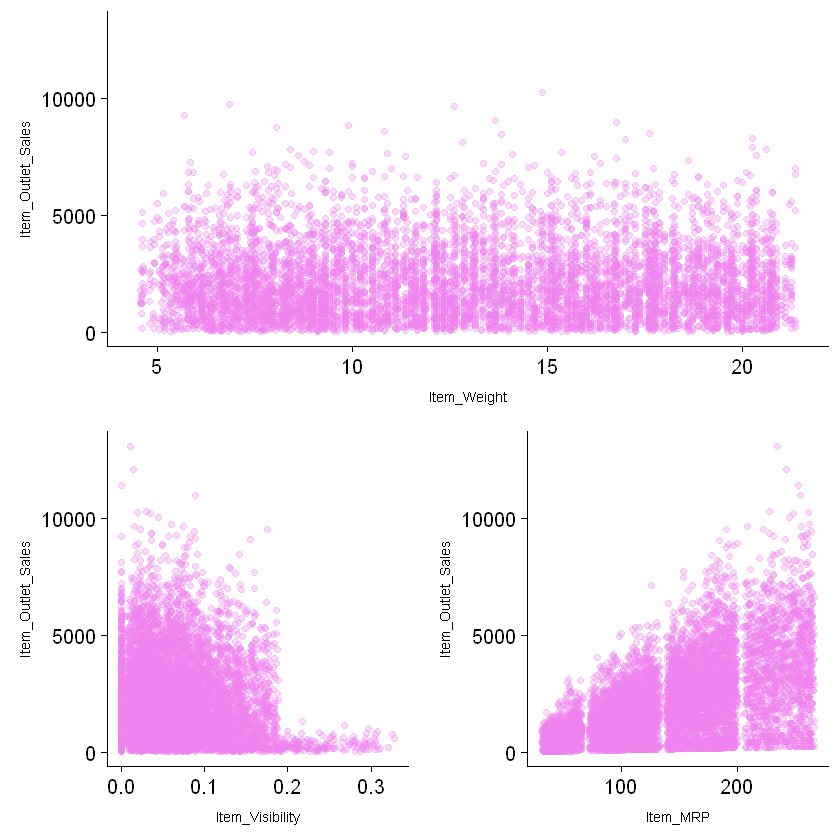

In [14]:
## EDA - Bivariate

train = combi[1:nrow(train)]

# Item_Weight vs Item_Outlet_Sales
p9 = ggplot(train) + geom_point(aes(Item_Weight, Item_Outlet_Sales), colour = "violet", alpha = 0.3) +
     theme(axis.title = element_text(size = 8.5))

# Item_Visibility vs Item_Outlet_Sales
p10 = ggplot(train) + geom_point(aes(Item_Visibility, Item_Outlet_Sales), colour = "violet", alpha = 0.3) +
      theme(axis.title = element_text(size = 8.5))

# Item_MRP vs Item_Outlet_Sales
p11 = ggplot(train) + geom_point(aes(Item_MRP, Item_Outlet_Sales), colour = "violet", alpha = 0.3) +
      theme(axis.title = element_text(size = 8.5))

second_row_2 = plot_grid(p10, p11, ncol = 2)

plot_grid(p9, second_row_2, nrow = 2)


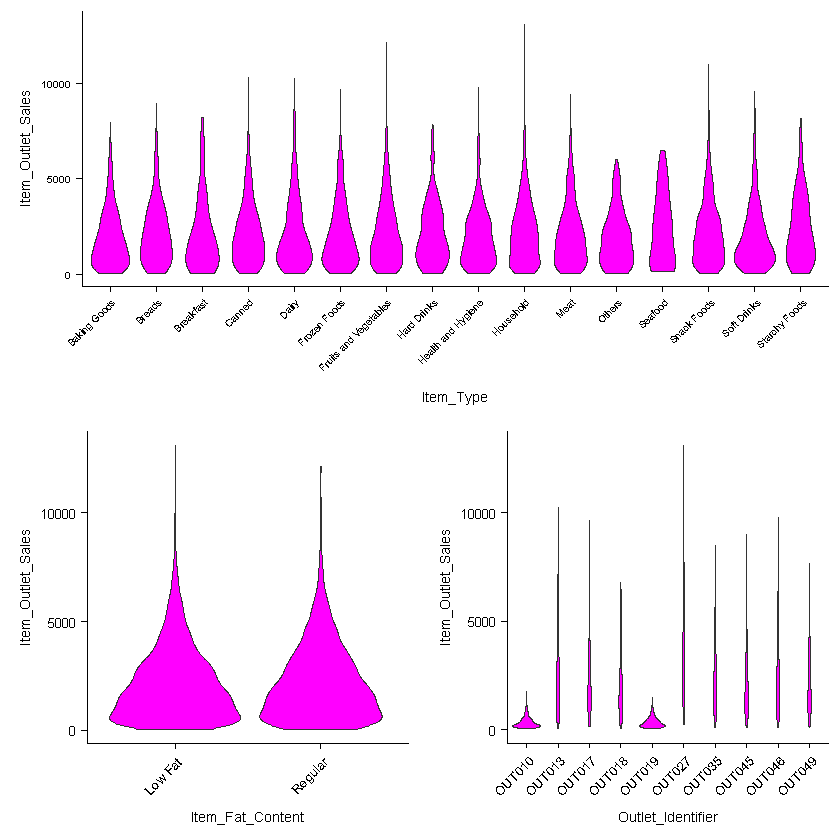

In [15]:
# Item_Type vs Item_Outlet_Sales
p12 = ggplot(train) + geom_violin(aes(Item_Type, Item_Outlet_Sales), fill = "magenta") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text = element_text(size = 6),
        axis.title = element_text(size = 8.5))

# Item_Fat_Content vs Item_Outlet_Sales
p13 = ggplot(train) + geom_violin(aes(Item_Fat_Content, Item_Outlet_Sales), fill = "magenta") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 8.5))

# Outlet_Identifier vs Item_Outlet_Sales
p14 = ggplot(train) + geom_violin(aes(Outlet_Identifier, Item_Outlet_Sales), fill = "magenta") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 8.5))

second_row_3 = plot_grid(p13, p14, ncol = 2)

plot_grid(p12, second_row_3, ncol = 1)

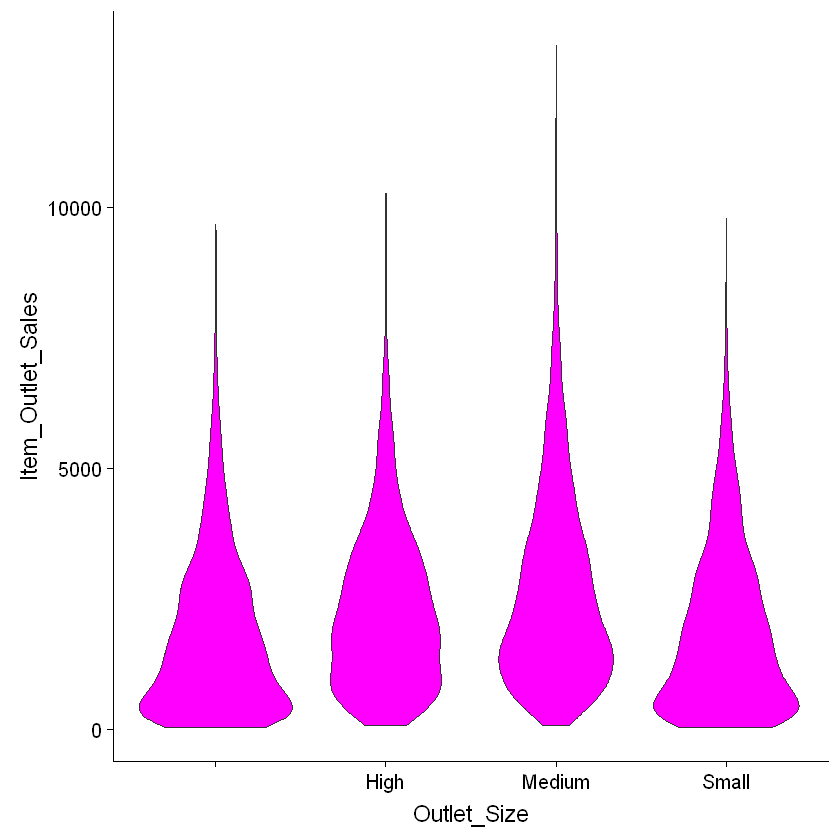

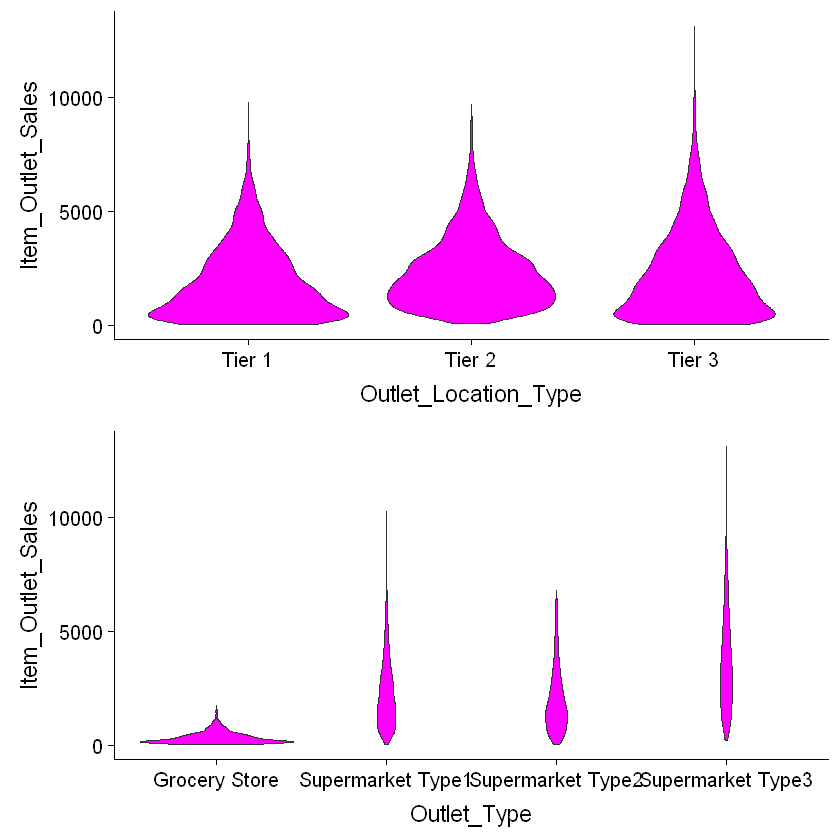

In [16]:
ggplot(train) + geom_violin(aes(Outlet_Size, Item_Outlet_Sales), fill = "magenta")

p15 = ggplot(train) + geom_violin(aes(Outlet_Location_Type, Item_Outlet_Sales), fill = "magenta")

p16 = ggplot(train) + geom_violin(aes(Outlet_Type, Item_Outlet_Sales), fill = "magenta")

plot_grid(p15, p16, ncol = 1)

## Missing Value Treatment

In [17]:
## Missing Value Treatment

missing_index = which(is.na(combi$Item_Weight))
for(i in missing_index){
  
  item = combi$Item_Identifier[i]
  combi$Item_Weight[i] = mean(combi$Item_Weight[combi$Item_Identifier == item], na.rm = T)
  
}

# replacing 0 in Item_Visibility with mean
zero_index = which(combi$Item_Visibility == 0)
for(i in zero_index){
  
  item = combi$Item_Identifier[i]
  combi$Item_Visibility[i] = mean(combi$Item_Visibility[combi$Item_Identifier == item], na.rm = T)
  
}

## Feature Engineering

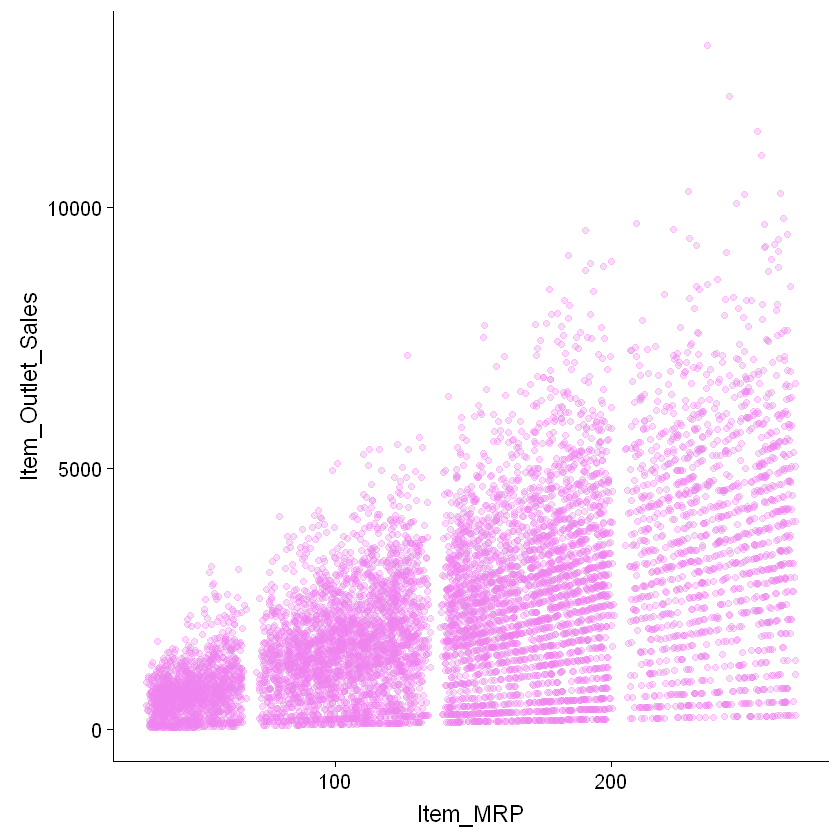

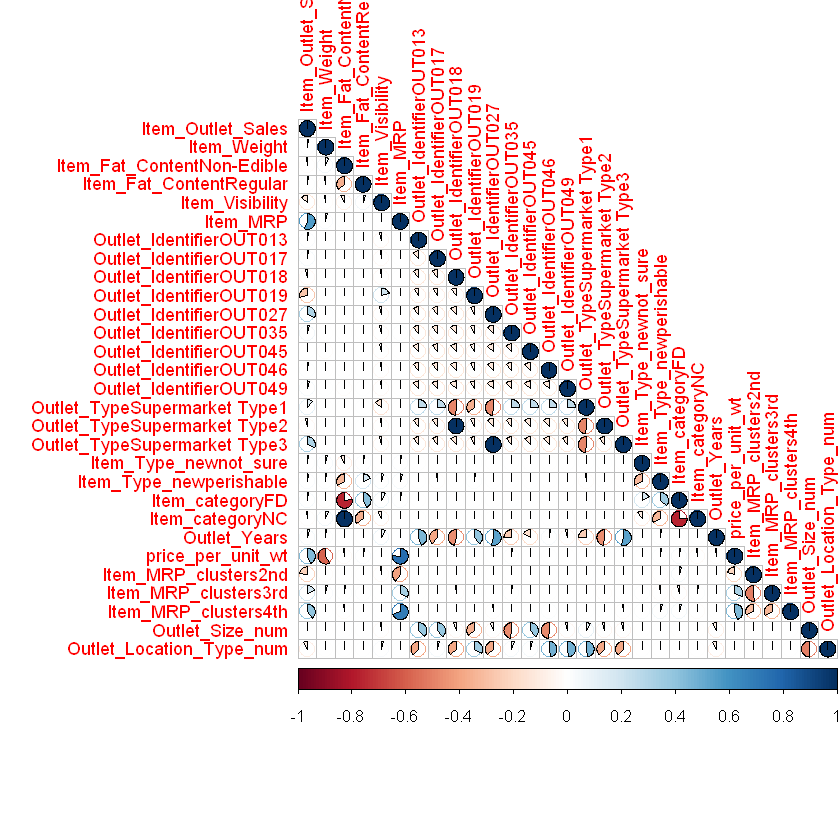

In [18]:
## Feature Engineering

# create a new feature 'Item_Type_new' 
perishable = c("Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood")
non_perishable = c("Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene",
                   "Household", "Soft Drinks")

combi[,Item_Type_new := ifelse(Item_Type %in% perishable, "perishable",
                               ifelse(Item_Type %in% non_perishable, "non_perishable", "not_sure"))]


combi[,Item_category := substr(combi$Item_Identifier, 1, 2)]

combi$Item_Fat_Content[combi$Item_category == "NC"] = "Non-Edible"

# years of operation of outlets
combi[,Outlet_Years := 2013 - Outlet_Establishment_Year]
combi$Outlet_Establishment_Year = as.factor(combi$Outlet_Establishment_Year)

# Price per unit weight
combi[,price_per_unit_wt := Item_MRP/Item_Weight]


ggplot(train) + geom_point(aes(Item_MRP, Item_Outlet_Sales), colour = "violet", alpha = 0.3)

# creating new independent variable - Item_MRP_clusters
combi[,Item_MRP_clusters := ifelse(Item_MRP < 69, "1st", 
                                   ifelse(Item_MRP >= 69 & Item_MRP < 136, "2nd",
                                          ifelse(Item_MRP >= 136 & Item_MRP < 203, "3rd", "4th")))]
#-------------------------------------------------------------------------------------------------------------------------

## Label Encoding

combi[,Outlet_Size_num := ifelse(Outlet_Size == "Small", 0,
                                 ifelse(Outlet_Size == "Medium", 1, 2))]

combi[,Outlet_Location_Type_num := ifelse(Outlet_Location_Type == "Tier 3", 0,
                                          ifelse(Outlet_Location_Type == "Tier 2", 1, 2))]

# removing categorical variables after label encoding
combi[, c("Outlet_Size", "Outlet_Location_Type") := NULL]

#-------------------------------------------------------------------------------------------------------------------------

## One Hot Encoding

ohe = dummyVars("~.", data = combi[,-c("Item_Identifier", "Outlet_Establishment_Year", "Item_Type")], fullRank = T)
ohe_df = data.table(predict(ohe, combi[,-c("Item_Identifier", "Outlet_Establishment_Year", "Item_Type")]))

combi = cbind(combi[,"Item_Identifier"], ohe_df)
#-------------------------------------------------------------------------------------------------------------------------

## Remove skewness

combi[,Item_Visibility := log(Item_Visibility + 1)] # log + 1 to avoid division by zero
combi[,price_per_unit_wt := log(price_per_unit_wt + 1)]

#-------------------------------------------------------------------------------------------------------------------------

## Scaling and Centering data

num_vars = which(sapply(combi, is.numeric)) # index of numeric features
num_vars_names = names(num_vars)

combi_numeric = combi[,setdiff(num_vars_names, "Item_Outlet_Sales"), with = F]

prep_num = preProcess(combi_numeric, method=c("center", "scale"))
combi_numeric_norm = predict(prep_num, combi_numeric)

#-------------------------------------------------------------------------------------------------------------------------

combi[,setdiff(num_vars_names, "Item_Outlet_Sales") := NULL] # removing numeric independent variables
combi = cbind(combi, combi_numeric_norm)

#-------------------------------------------------------------------------------------------------------------------------

## splitting data back to train and test
train = combi[1:nrow(train)]
test = combi[(nrow(train) + 1):nrow(combi)]
test[,Item_Outlet_Sales := NULL] # removing Item_Outlet_Sales as it contains only NA for test dataset

## Correlation Plot
cor_train = cor(train[,-c("Item_Identifier")])

corrplot(cor_train, method = "pie", type = "lower", tl.cex = 0.9)

## Model Building

### Linear Regression

In [19]:
## Linear Regression
linear_reg_mod = lm(Item_Outlet_Sales ~ ., data = train[,-c("Item_Identifier")])

## predicting on test set and writing a submission file
submission$Item_Outlet_Sales = predict(linear_reg_mod, test[,-c("Item_Identifier")])
write.csv(submission, "Linear_Reg_submit.csv", row.names = F)

Warning message in predict.lm(linear_reg_mod, test[, -c("Item_Identifier")]):
"prediction from a rank-deficient fit may be misleading"

### Lasso Regression

In [20]:
## Lasso Regression
set.seed(1235)
my_control = trainControl(method="cv", number=5)
Grid = expand.grid(alpha = 1, lambda = seq(0.001,0.1,by = 0.0002))

lasso_linear_reg_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], y = train$Item_Outlet_Sales,
                       method='glmnet', trControl= my_control, tuneGrid = Grid)

# mean validation score
mean(lasso_linear_reg_mod$resample$RMSE)

[1] 1130.019

### Ridge Regression

In [21]:
## Ridge Regression
set.seed(1236)
my_control = trainControl(method="cv", number=5)
Grid = expand.grid(alpha = 0, lambda = seq(0.001,0.1,by = 0.0002))

ridge_linear_reg_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], y = train$Item_Outlet_Sales,
                       method='glmnet', trControl= my_control, tuneGrid = Grid)

# mean validation score
mean(ridge_linear_reg_mod$resample$RMSE)

[1] 1135.085

### RandomForest Model

[1] 1088.052

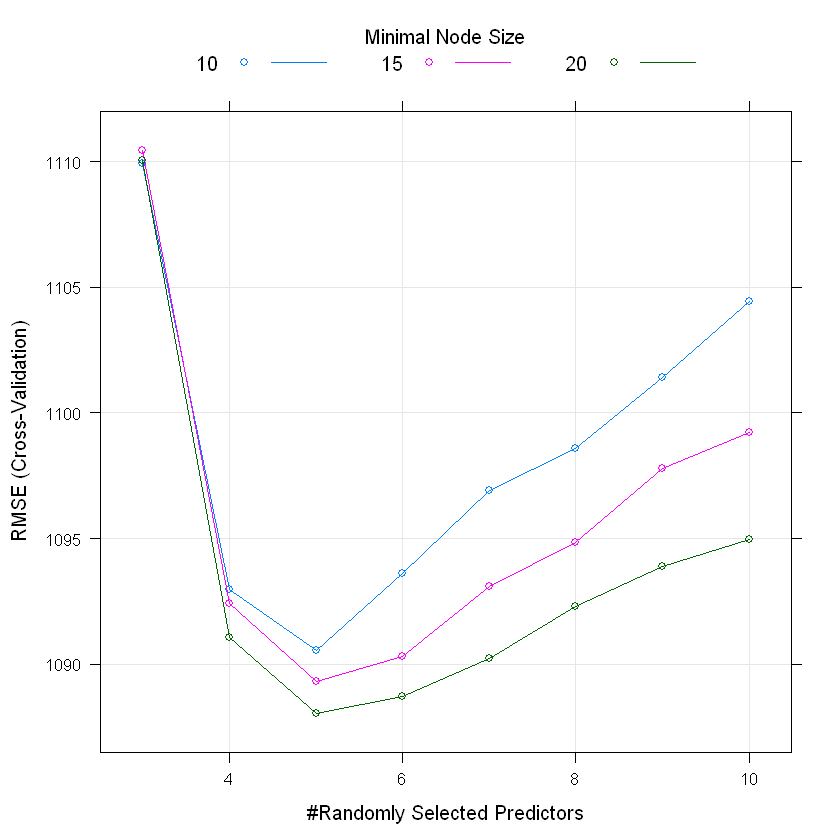

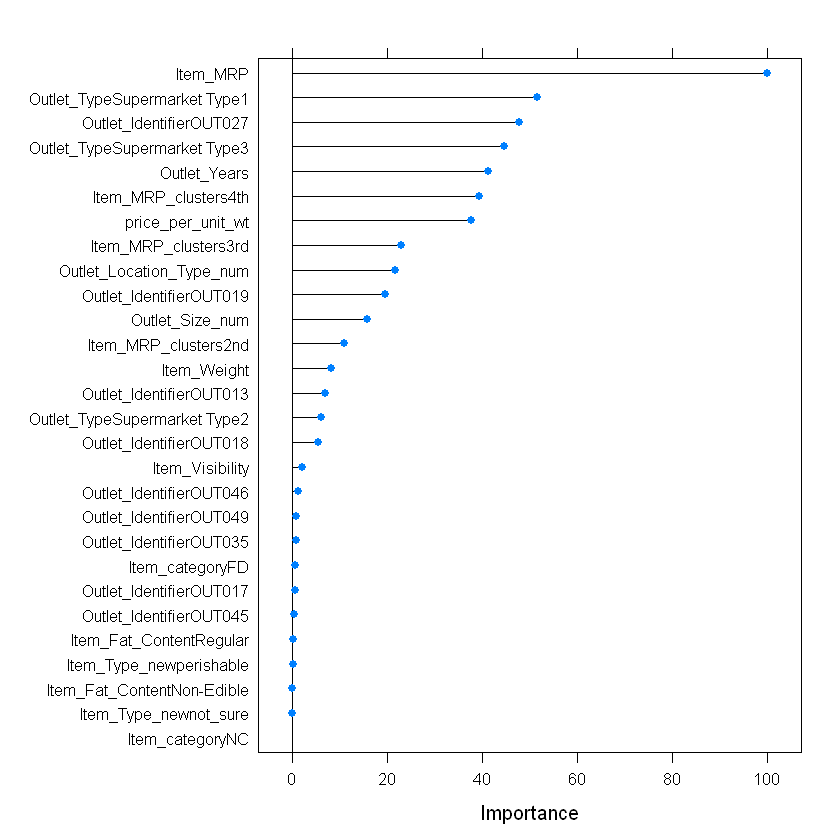

In [24]:
## RandomForest Model
set.seed(1237)
my_control = trainControl(method="cv", number=5)

tgrid = expand.grid(
  .mtry = c(3:10),
  .splitrule = "variance",
  .min.node.size = c(10,15,20)
)

rf_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], 
               y = train$Item_Outlet_Sales,
               method='ranger', 
               trControl= my_control, 
               tuneGrid = tgrid,
               num.trees = 400,
               importance = "permutation")

# mean validation score
mean(rf_mod$resample$RMSE)

## plot displaying RMSE scores for different tuning parameters
plot(rf_mod)

## plot variable importance
plot(varImp(rf_mod))

In [28]:
## predicting on test set and writing a submission file
submission$Item_Outlet_Sales = predict(rf_mod, test[,-c("Item_Identifier")])
write.csv(submission, "RF_submit.csv", row.names = F)

### XGBoost modeling

[1]	train-rmse:2746.725586+7.336395	test-rmse:2746.741797+30.998116 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 30 rounds.

[11]	train-rmse:2537.260938+5.858499	test-rmse:2539.031055+31.050055 
[21]	train-rmse:2349.231885+4.482735	test-rmse:2352.873389+32.255671 
[31]	train-rmse:2182.393750+4.819384	test-rmse:2187.824902+31.588163 
[41]	train-rmse:2033.432080+3.195964	test-rmse:2040.415454+31.588752 
[51]	train-rmse:1900.760058+2.740688	test-rmse:1910.174609+30.442020 
[61]	train-rmse:1784.256690+2.877070	test-rmse:1796.284033+28.750707 
[71]	train-rmse:1680.479932+2.497050	test-rmse:1695.349048+28.331918 
[81]	train-rmse:1590.351367+2.354304	test-rmse:1607.833301+27.908130 
[91]	train-rmse:1510.894165+2.035948	test-rmse:1531.593726+27.522115 
[101]	train-rmse:1441.319312+1.659380	test-rmse:1465.053589+29.087921 
[111]	train-rmse:1381.578052+2.426386	test-rmse:1408.426611+27.691651 
[121]	train-rmse:1329.56550

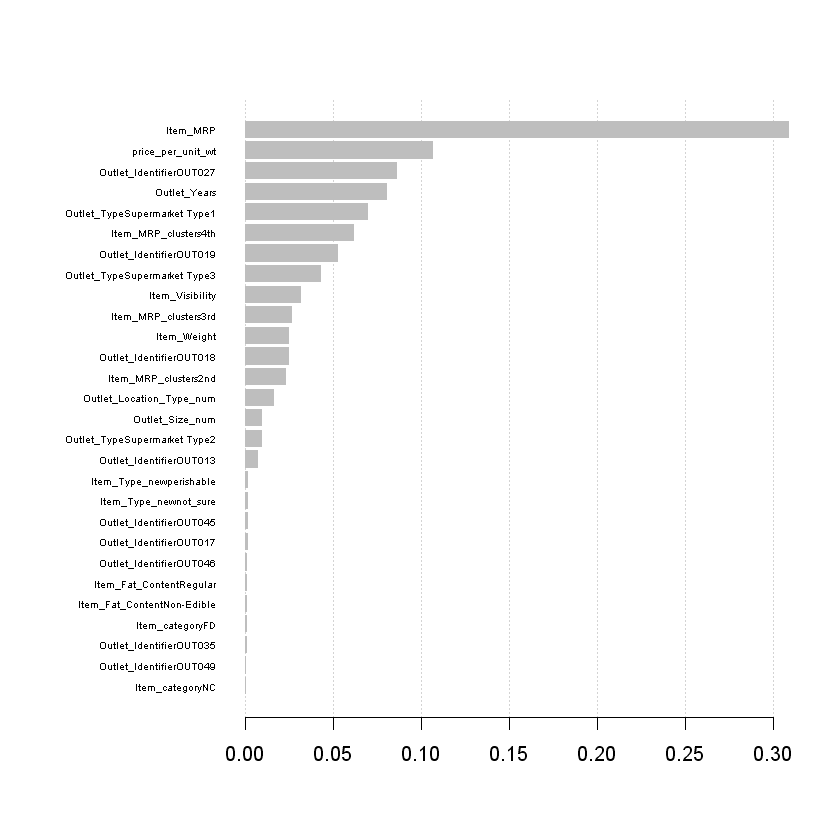

In [25]:
## List of parameters for XGBoost modeling
param_list = list(
        
        objective = "reg:linear",
        eta=0.01,
        gamma = 1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.5
        )

## converting train and test into xgb.DMatrix format
dtrain = xgb.DMatrix(data = as.matrix(train[,-c("Item_Identifier", "Item_Outlet_Sales")]), label= train$Item_Outlet_Sales)
dtest = xgb.DMatrix(data = as.matrix(test[,-c("Item_Identifier")]))

## 5-fold cross-validation to find optimal value of nrounds
set.seed(112)
xgbcv = xgb.cv(params = param_list, 
               data = dtrain, 
               nrounds = 1000, 
               nfold = 5, 
               print_every_n = 10, 
               early_stopping_rounds = 30, 
               maximize = F)

## training XGBoost model at nrounds = 430
xgb_model = xgb.train(data = dtrain, params = param_list, nrounds = 430)

## Variable Importance
var_imp = xgb.importance(feature_names = setdiff(names(train), c("Item_Identifier", "Item_Outlet_Sales")), 
                         model = xgb_model)

xgb.plot.importance(var_imp)



In [28]:
## predicting on test set and writing a submission file
submission$Item_Outlet_Sales = predict(xgb_model, dtest)
write.csv(submission, "XGB_submit.csv", row.names = F)